# **Sprint 2**

**Importing the packages**

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

**Loading the data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Analysing the data**

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

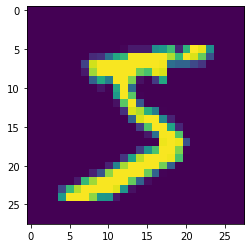

In [7]:
plt.imshow(X_train[0])

**Data Preprocessing**

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [12]:
number_of_classes = 13
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [13]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Creating the Mode**l

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))


In [17]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

**Training the Mode**l

In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.2337 - accuracy: 0.9513 - val_loss: 0.0916 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0661 - accuracy: 0.9802 - val_loss: 0.0797 - val_accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0859 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0858 - val_accuracy: 0.9767


**Testing the Model**

In [19]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.08575306832790375, 0.9767000079154968]


In [20]:
prediction = model.predict(X_test[:3])
print(prediction)

1/1 [==============================] - 0s 74ms/step
[[3.55846619e-09 1.00257623e-14 8.95824304e-09 9.62930624e-09
  6.82434469e-13 1.72464040e-11 2.83183782e-14 9.99993682e-01
  5.94650555e-06 3.51784450e-07 8.94946389e-13 1.42439055e-11
  2.26956605e-12]
 [6.64347688e-10 5.42718581e-09 1.00000000e+00 3.25032667e-10
  2.28244937e-14 1.30578545e-13 4.38099370e-08 1.19369770e-14
  1.14365340e-11 9.53326688e-15 2.91917792e-12 9.28705984e-12
  7.37537744e-13]
 [2.88049864e-06 9.85753655e-01 3.18325619e-04 3.11273812e-10
  3.42162493e-05 3.13991331e-05 3.57299790e-08 1.85080307e-08
  1.38587700e-02 4.44690285e-09 1.19050929e-08 6.27972042e-07
  2.16650466e-08]]


In [21]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:3])

[7 2 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
